In [1]:
import vaex as vx
import pylab
%matplotlib inline

/Users/users/breddels/.local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


/Users/users/breddels/vaex-testing/python/vaex/dataset.py:2086: RuntimeWarning: divide by zero encountered in power
  F *= np.where(np.sqrt(k) > k_max, 0, np.sqrt(k**n) * np.exp(-k*4.0))
/Users/users/breddels/vaex-testing/python/vaex/dataset.py:2086: RuntimeWarning: invalid value encountered in multiply
  F *= np.where(np.sqrt(k) > k_max, 0, np.sqrt(k**n) * np.exp(-k*4.0))


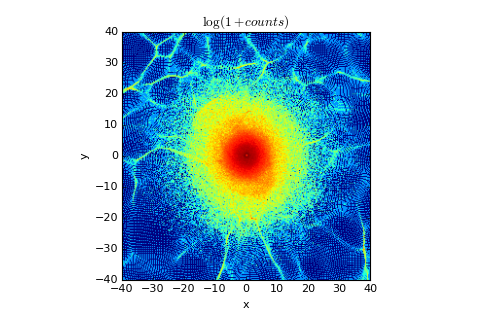

In [2]:
ds = vx.zeldovich(scale=100, t=1e1).concat(vx.example())
#ds = vx.example()
ds("x", "y").bounded_by_sigmas(square=True).gridded()

In [3]:
ds.export_hdf5("concat.hdf5", column_names=["x", "y"], shuffle=True, selection=False)

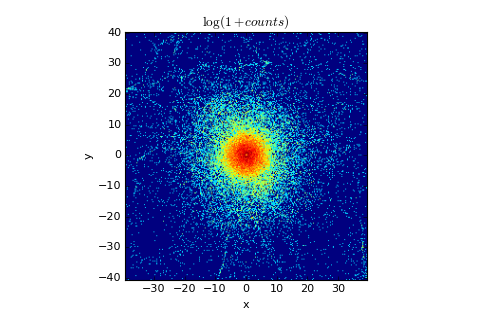

In [4]:
shuffled = vx.open("concat.hdf5")
xy = shuffled("x", "y")
shuffled.set_active_fraction(0.1)
limits = xy.limits_sigma()
xy.bounded_by(limits).gridded()